<a href="https://colab.research.google.com/github/basketbob/ML/blob/main/netology_DS/mds24_hw8_KuzinVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Случайные величины и вероятности".

## Уровень 0:


### Задание 1

В магазин привезли устройства с 3-х разных предприятий.

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта.

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [1]:
# Вероятности выбрать продукцию с каждого предприятия
P_B1 = 0.20
P_B2 = 0.30
P_B3 = 0.50

# Вероятности выбрать продукцию высшего сорта с каждого предприятия
P_A_given_B1 = 0.10
P_A_given_B2 = 0.05
P_A_given_B3 = 0.20

# Используем формулу полной вероятности для вычисления искомой вероятности
P_A = (P_B1 * P_A_given_B1) + (P_B2 * P_A_given_B2) + (P_B3 * P_A_given_B3)

print(f"Вероятность того, что случайно купленная продукция будет высшего сорта: {P_A:.2%}")

Вероятность того, что случайно купленная продукция будет высшего сорта: 13.50%


### Задание 2


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

In [2]:
# Определим функцию для проверки независимости событий
def are_independent(p_a, p_b, p_ab):
    """
    Check if two events A and B are independent.
    """
    return p_ab == p_a * p_b

# Вероятность выпадения орла или решки для одной монеты
p_head = 1/2
p_tail = 1/2

# Вероятности событий A1, A2 и A3
p_a1 = p_head * p_head + p_tail * p_tail  # Вероятность, что монеты 1 и 2 упали одной стороной
p_a2 = p_head * p_head + p_tail * p_tail  # То же для монет 2 и 3
p_a3 = p_head * p_head + p_tail * p_tail  # То же для монет 1 и 3

# Вероятности пересечения событий
p_a1_a2 = p_head**3 + p_tail**3  # Вероятность, что монеты 1 и 2, а также 2 и 3 упали одной стороной
p_a1_a3 = p_head**3 + p_tail**3  # Аналогично для монет 1 и 3, а также 1 и 2
p_a2_a3 = p_head**3 + p_tail**3  # Аналогично для монет 2 и 3, а также 1 и 3

# Проверяем попарную независимость
pairwise_independence = (
    are_independent(p_a1, p_a2, p_a1_a2) and
    are_independent(p_a1, p_a3, p_a1_a3) and
    are_independent(p_a2, p_a3, p_a2_a3)
)

# Вероятность пересечения всех трех событий
p_a1_a2_a3 = p_head**3 + p_tail**3  # Вероятность, что все три монеты упали одной стороной

# Проверяем независимость в совокупности
collective_independence = p_a1_a2_a3 == p_a1 * p_a2 * p_a3

print(f"События попарно независимы: {pairwise_independence}")
print(f"События независимы в совокупности: {collective_independence}")


События попарно независимы: True
События независимы в совокупности: False


## Уровень 1:

### Задание 3


Изучите 3 распределения из библиотеки scipy: [Нормальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), [Экспоненциальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html), [Стьюдента](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Используя функцию плотности распредления (`pdf`), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения.

Дополнительная информация [тут](https://pythonguides.com/scipy-stats/).

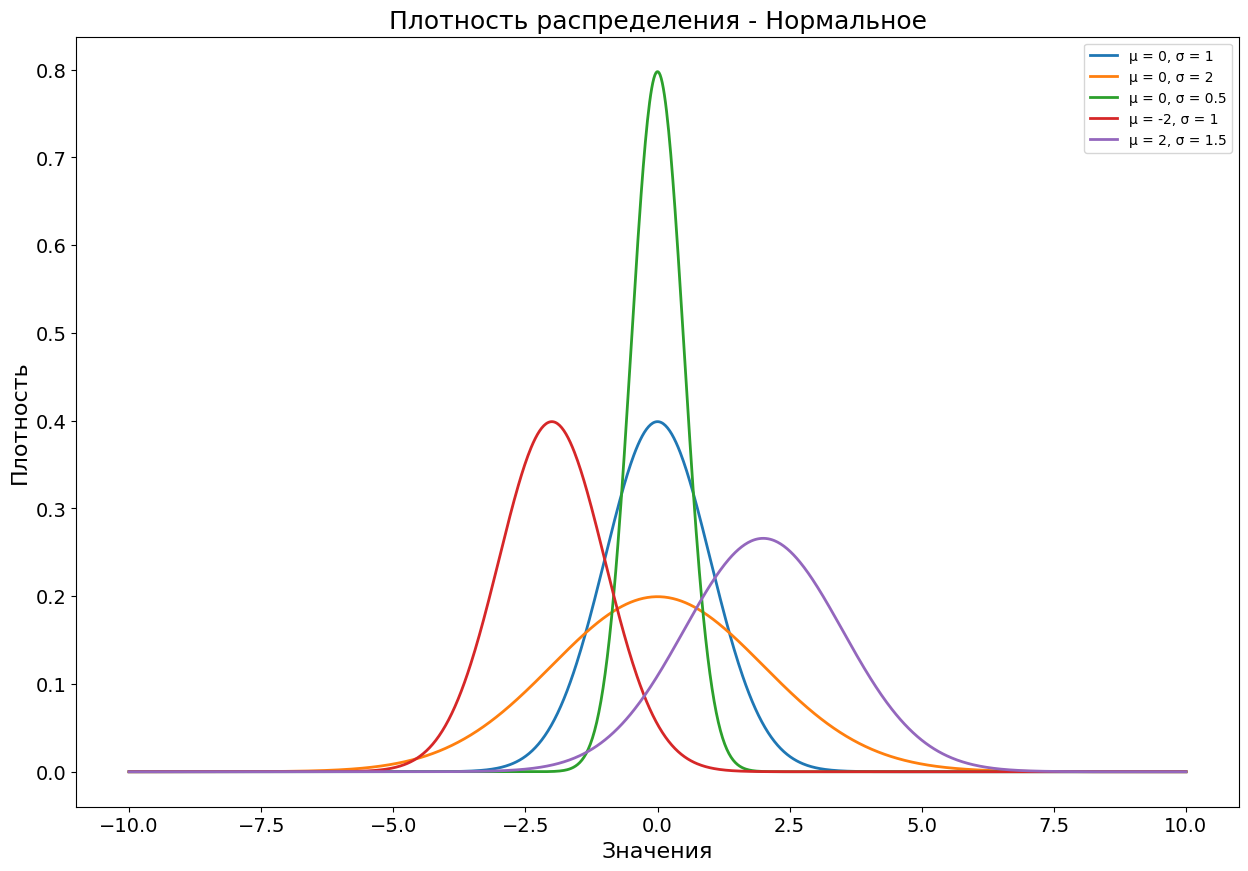

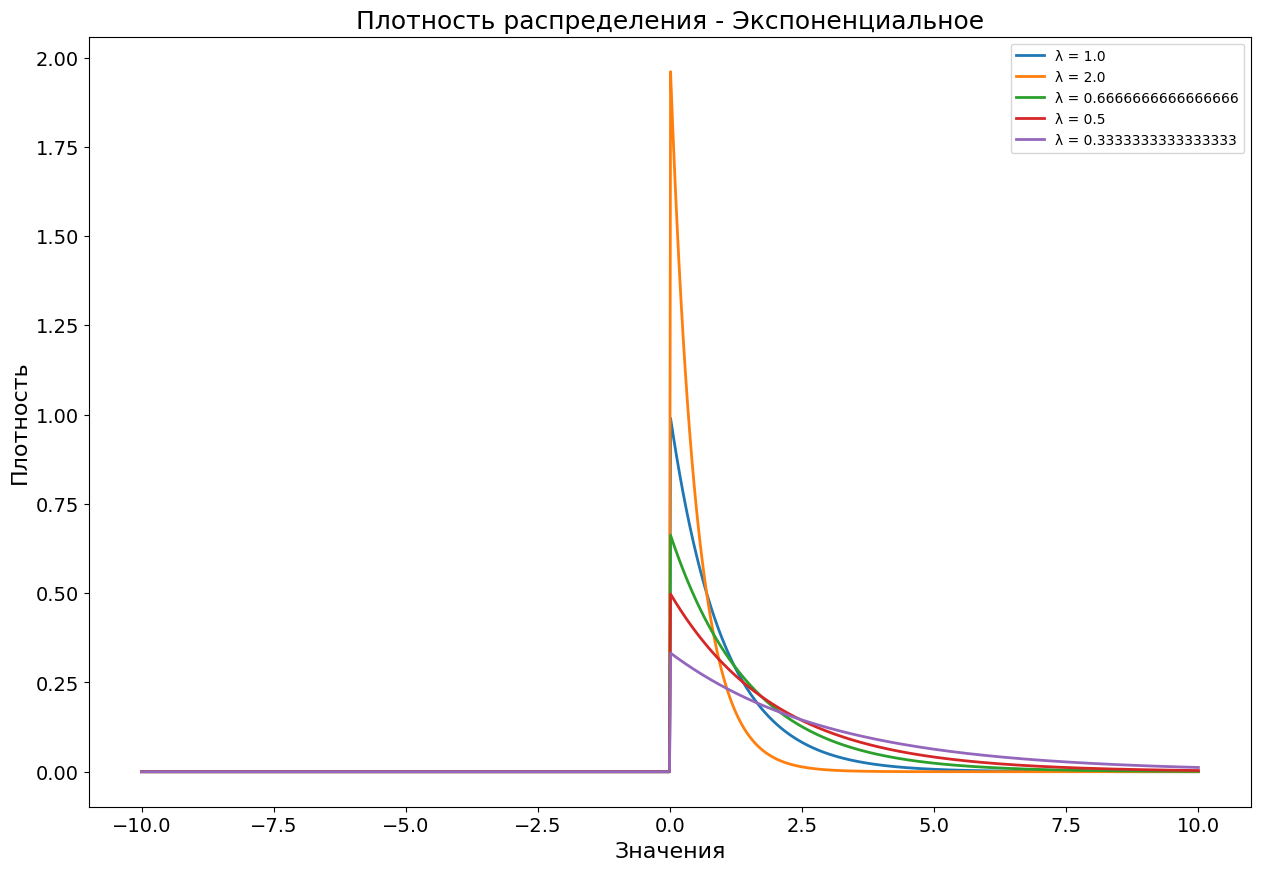

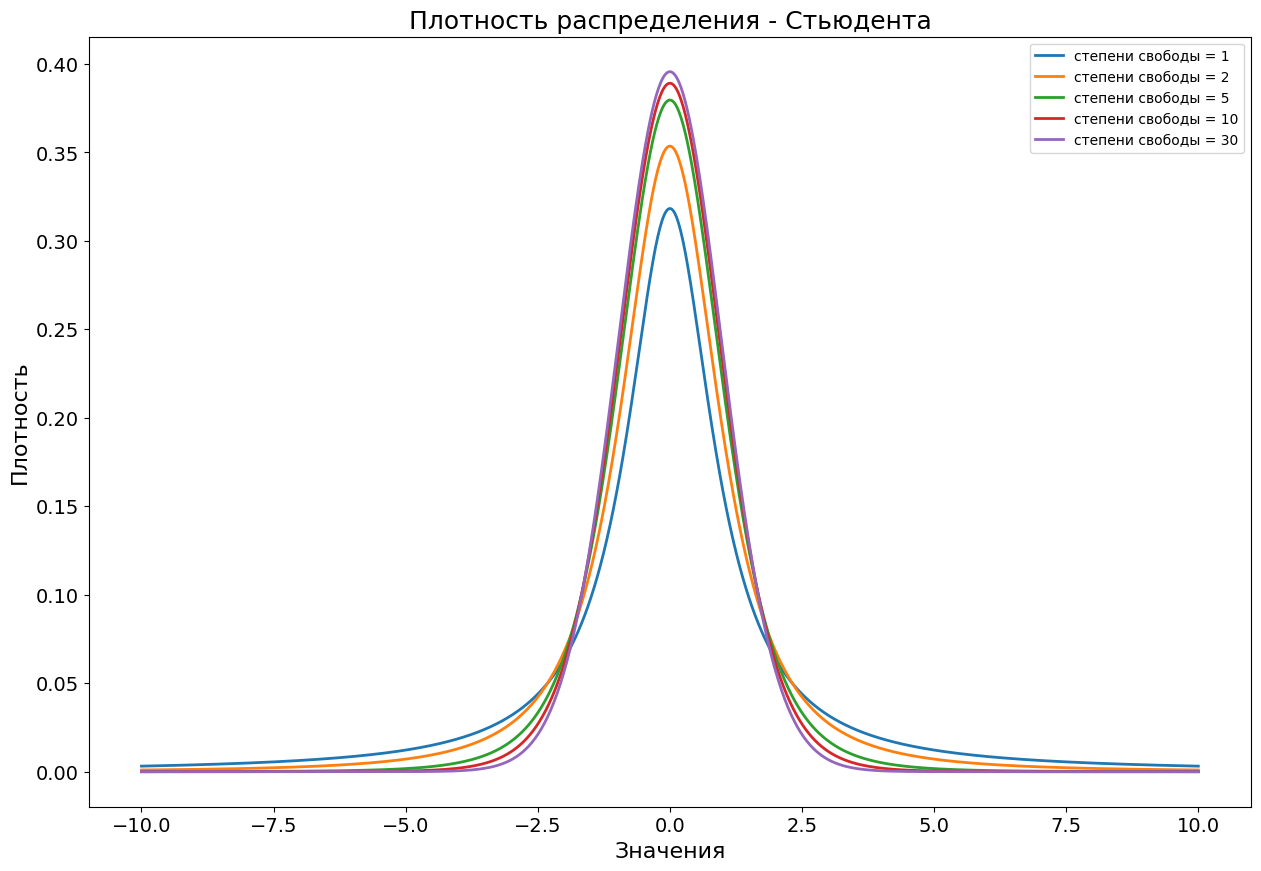

Наблюдения о влиянии параметров:
Нормальное распределение:
- μ (среднее или положение) контролирует центр распределения.
- σ (стандартное отклонение) контролирует 'ширину' распределения.

Экспоненциальное распределение:
- λ (или 1/λ, где λ - параметр масштаба) контролирует скорость убывания распределения.

Распределение Стьюдента:
- Степени свободы (df) влияют на 'толщину хвостов' распределения; больше df - ближе к нормальному.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, t

# Задаем параметры для отображения графиков
params = {
    'figure.figsize': (15, 10),
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'lines.linewidth': 2
}
plt.rcParams.update(params)

# Функция для построения графиков для различных параметров
def plot_distributions(dist, params, x, dist_name):
    plt.figure()
    for param in params:
        if dist_name == 'Нормальное':
            pdf = dist.pdf(x, loc=param['mu'], scale=param['sigma'])
            label = f'μ = {param["mu"]}, σ = {param["sigma"]}'
        elif dist_name == 'Экспоненциальное':
            pdf = dist.pdf(x, scale=param['lambda'])
            label = f'λ = {1/param["lambda"]}'
        elif dist_name == 'Стьюдента':
            pdf = dist.pdf(x, df=param['df'])
            label = f'степени свободы = {param["df"]}'

        plt.plot(x, pdf, label=label)

    plt.title(f'Плотность распределения - {dist_name}')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    plt.legend()
    plt.show()

# Параметры и диапазон значений для графиков
x = np.linspace(-10, 10, 1000)
normal_params = [{'mu': 0, 'sigma': 1}, {'mu': 0, 'sigma': 2},
                 {'mu': 0, 'sigma': 0.5}, {'mu': -2, 'sigma': 1},
                 {'mu': 2, 'sigma': 1.5}]
expon_params = [{'lambda': 1}, {'lambda': 0.5},
                {'lambda': 1.5}, {'lambda': 2},
                {'lambda': 3}]
t_params = [{'df': 1}, {'df': 2},
            {'df': 5}, {'df': 10},
            {'df': 30}]

# Построение графиков
plot_distributions(norm, normal_params, x, 'Нормальное')
plot_distributions(expon, expon_params, x, 'Экспоненциальное')
plot_distributions(t, t_params, x, 'Стьюдента')

# Наблюдения
print("Наблюдения о влиянии параметров:")
print("Нормальное распределение:")
print("- μ (среднее или положение) контролирует центр распределения.")
print("- σ (стандартное отклонение) контролирует 'ширину' распределения.")
print("\nЭкспоненциальное распределение:")
print("- λ (или 1/λ, где λ - параметр масштаба) контролирует скорость убывания распределения.")
print("\nРаспределение Стьюдента:")
print("- Степени свободы (df) влияют на 'толщину хвостов' распределения; больше df - ближе к нормальному.")


1. Нормальное распределение:
- Параметр mu (среднее значение, loc в scipy.stats) сдвигает распределение влево или вправо на графике.
- Параметр sigma (стандартное отклонение, scale в scipy.stats) контролирует разброс значений вокруг среднего. Чем больше sigma, тем шире распределение.

2. Экспоненциальное распределение:
- Параметр lambda (или 1/lambda, который является параметром масштаба scale в scipy.stats) определяет скорость убывания функции. Чем меньше значение lambda, тем медленнее убывает функция.

3. Распределение Стьюдента:
- Параметр df (степени свободы) влияет на форму распределения. С маленькими значениями df, распределение имеет тяжёлые хвосты. По мере увеличения df, распределение становится более похожим на нормальное.